<a href="https://colab.research.google.com/github/mccronep/Ray_Trace_for_NEXRAD/blob/main/plot_beam_height_km_every_vcp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Standard Atmosphere plot of radar beam height.
## All values are metric until we convert to feet and nautical miles at the conclusion.
##
## Written by Paul MCCRONE, NOAA/NWS/Radar Operations Center Field Requirements Branch
##

In [2]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
    print("Modules Loaded")
except:
    print('Error loading modules')


Modules Loaded


In [3]:
# H=       Height of the Beam Centerline above sea level
# H0=      Height of the radar above sea  level = STE + TWR_HT
# STE=     Station elevation
# TWR_HT=  Tower Height
# R=       Range (distance) to target in km
# PHi=     elevation angles of beam in degrees
# Re=      Radus of Earth = 6374 km


#
# H = SQRT ( R^2 +((4/3)Re + H0)^2  +2R((4/3)Re+H0)sin(PHi)-(4/3)Re )
#

VCP_List=[12,112,212,215,31,32,35]

VCP = VCP_List[0]

Beam="Center "

Beam_Value=0.48
##
## Set the Beam Value to 0.0 for Center Beam only
## The current setting is 0.48 because we want the upper and lower beam, and that is 0.96
Re=6374.0
#(The earth Radius is in km)


# WE will assume VCP 212- 

PHi215=[0.0, 0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4, 8.0, 10.0, 12.0, 14.0, 16.7, 19.5]
PHi212=[0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4, 8.0, 10.0, 12.5, 15.6, 19.5]

PHi212x=[0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4, 8.0, 10.0, 12.5, 15.6, 19.5]
PHi112=[0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4, 8.0, 10.0, 12.5, 15.6, 19.5]
PHi012=[0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4, 8.0, 10.0, 12.5, 15.6, 19.5]

PHi031=[0.0, 0.5, 0.9, 1.5, 2.5, 3.5, 4.5]

PHi032=[0.0, 0.5, 0.9, 1.5, 2.5, 3.5, 4.5]

PHi035=[0.0, 0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4]


if VCP == 212 :
    print("212")
    PHi212a=np.array(PHi212x)
elif VCP == 12:
    print("VCP 12 active")
    PHi212a=np.array(PHi012)
elif VCP == 112:
    print("VCP 112 active")
    PHi212a=np.array(PHi112)
elif VCP == 215:
    print("VCP 215 active")
    PHi212a=np.array(PHi215)
elif VCP == 31:
    print("VCP 31 active")
    PHi212a=np.array(PHi031)
elif VCP == 32:
    print("VCP 32 active")
    PHi212a=np.array(PHi032)
elif VCP == 35:
    print("VCP 35 active")
    PHi212a=np.array(PHi035)
else:
    PHi212a=np.array(PHi212x)
    print("VCP 212 is default, and another VCP was selected")


VCP 12 active


In [4]:
#PHi212a=np.array(PHi212)

PHi212lower=np.array(PHi212x)-Beam_Value

PHi212upper=np.array(PHi212x)+Beam_Value



print("Phi, the angles of elev for VCP"+str(VCP)+" are ", str(PHi212a))

Phi, the angles of elev for VCP12 are  [ 0.5  0.9  1.3  1.8  2.4  3.1  4.   5.1  6.4  8.  10.  12.5 15.6 19.5]


In [5]:
PHi212rad=np.radians(PHi212a)

PHi212Lrad=np.radians(PHi212lower)
PHi212Urad=np.radians(PHi212upper)


print("In Radians", str(PHi212rad))

PHi=PHi212rad
PHi_angle=PHi212
PHiU=PHi212Urad
PHiL=PHi212Lrad


In Radians [0.00872665 0.01570796 0.02268928 0.03141593 0.0418879  0.05410521
 0.06981317 0.08901179 0.11170107 0.13962634 0.17453293 0.21816616
 0.27227136 0.3403392 ]


In [6]:
R= np.arange(0.1,460.1,0.1)

In [7]:
R

array([1.000e-01, 2.000e-01, 3.000e-01, ..., 4.598e+02, 4.599e+02,
       4.600e+02])

In [8]:
RSQ=R**2


In [9]:
RSQ

array([1.0000000e-02, 4.0000000e-02, 9.0000000e-02, ..., 2.1141604e+05,
       2.1150801e+05, 2.1160000e+05])

In [10]:
r43=4.0/3.0

STE= 400.0#meters
TWR_HT=32.0#meters



H0m=STE+TWR_HT#mter
H0=H0m/1000.0 #Convert to km
#pri

In [11]:
print("H0= "+str(H0))

H0= 0.432


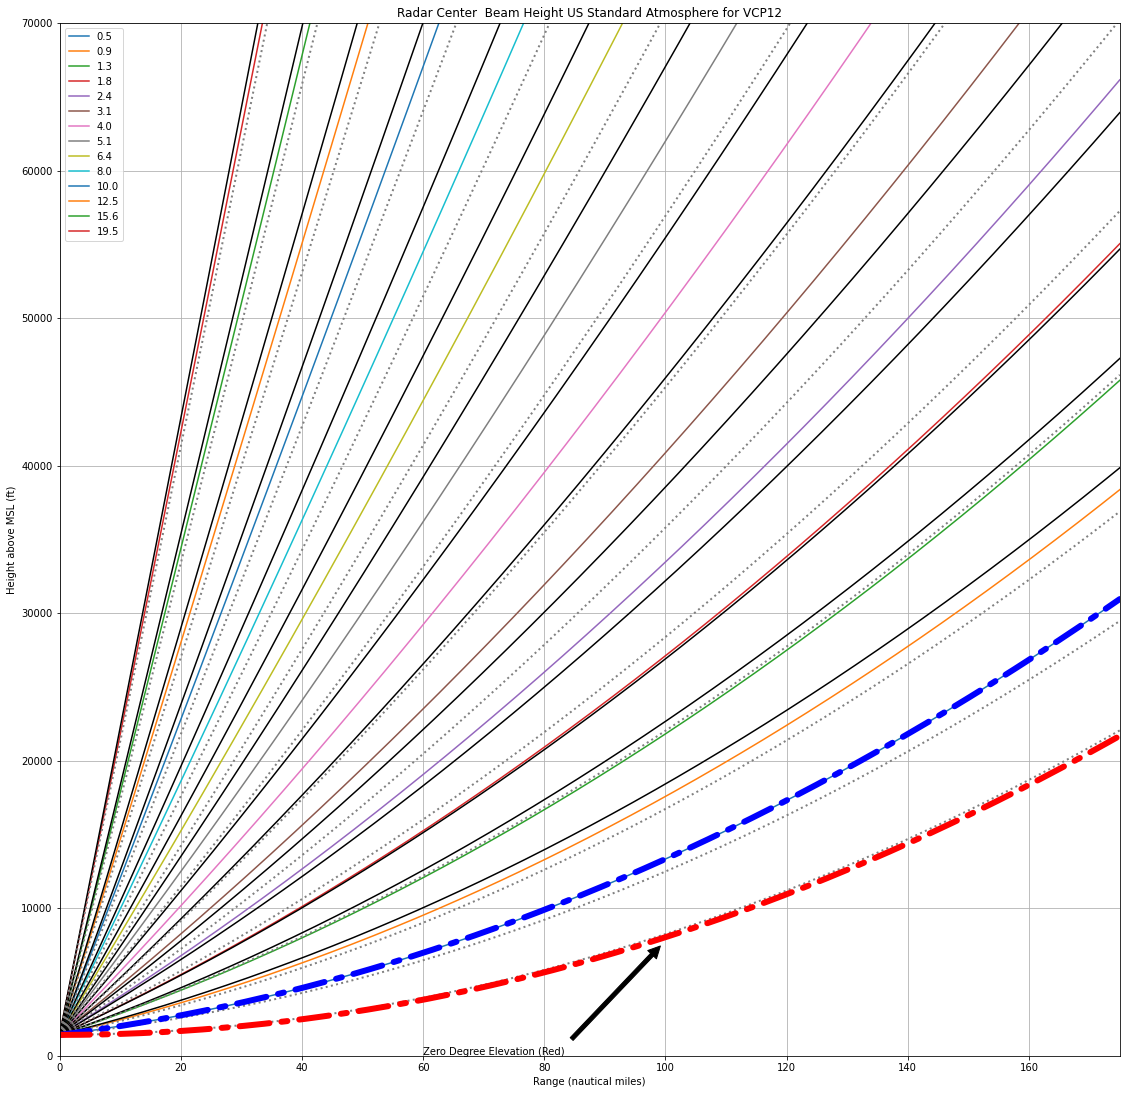

In [12]:

fig, ax = plt.subplots(figsize=(19,19))

#ax.plot(t, s)

#Note, R is n km.
Rnm = R*0.539957 #nautcal miles


xupperlimit=175.0
yupperlimit=70000

# First plot Center beam
counter=0
for angle in PHi:

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, label=str(PHi_angle[counter]))
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))
    counter=counter+1
    
# Then plot upper beam

for angle in PHiU:

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, color='black')
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))
    
# Plot lower beam
    
for angle in PHiL:

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, color='grey',linewidth=2, linestyle=':')
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))

#Plot the first elevation of the VCP (blue dashed)  
    
try: 
    angle=PHi[0]

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, color='blue',linestyle=(0, (5, 2, 1, 2)), linewidth=6,dash_capstyle='round')
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))
except:
    print("try") 
    
#Now show the 0 degree angle (red dashed).    
try: 
    angle=0

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, color='red',linestyle=(0, (5, 2, 1, 2)), linewidth=6,dash_capstyle='round')
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))
except:
    print("try")
    
    
    
plt.annotate('Zero Degree Elevation (Red)', xy=(100, 7800), xytext=(60, 100), 
             arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set(xlabel='Range (nautical miles)', ylabel='Height above MSL (ft)',title='Radar '+str(Beam)+' Beam Height US Standard Atmosphere for VCP'+str(VCP))

ax.grid()

fig.savefig("test.png")
plt.legend()
plt.show()